Compute the first 10000 iterates of the $\mathbf{H\acute{e}non}$ map
$$x_{n+1} = 1+y_n − \alpha x^2_n, \\ y_{n+1} = \beta x_n$$
where $α$ and $β$ are constants.Use Python to plot a power series spectrum.

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,8)

In [6]:
def Henon_map(a,b,n = 10000):

    def map_2d(X):
        x, y = X
        xn = 1 + y - a*x**2
        yn = b*x
        return (xn, yn)

    X0 = [(1 - b) / 2, (1 - b) / 2]
    X, Y = [], []
    for i in range(n):
        xn, yn = map_2d(X0)
        X, Y = X + [xn], Y + [yn]
        X0 = [xn, yn]

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(X, Y,color='r', s=0.05)
    ax1.set_title('map plot ', fontsize=20)
    ax1.set_xlabel('x', fontsize=15)
    ax1.set_ylabel('y', fontsize=15)
    ax1.tick_params(labelsize=15)
    f = np.linspace(-1, 1, n)
    power = np.abs(fft(X)**2)
    power = np.log(power)
    ax2.plot(f, power)
    ax2.set_xlim(0, 1)
    ax2.set_title('power spectra ', fontsize=20)
    ax2.set_xlabel('Frequency (Hz)', fontsize=15)
    ax2.set_ylabel('log(Power)', fontsize=15)
    ax2.tick_params(labelsize=15)
    plt.suptitle(r'$\alpha$={},$\beta$={}'.format(a,b), fontsize=25)
    plt.show()

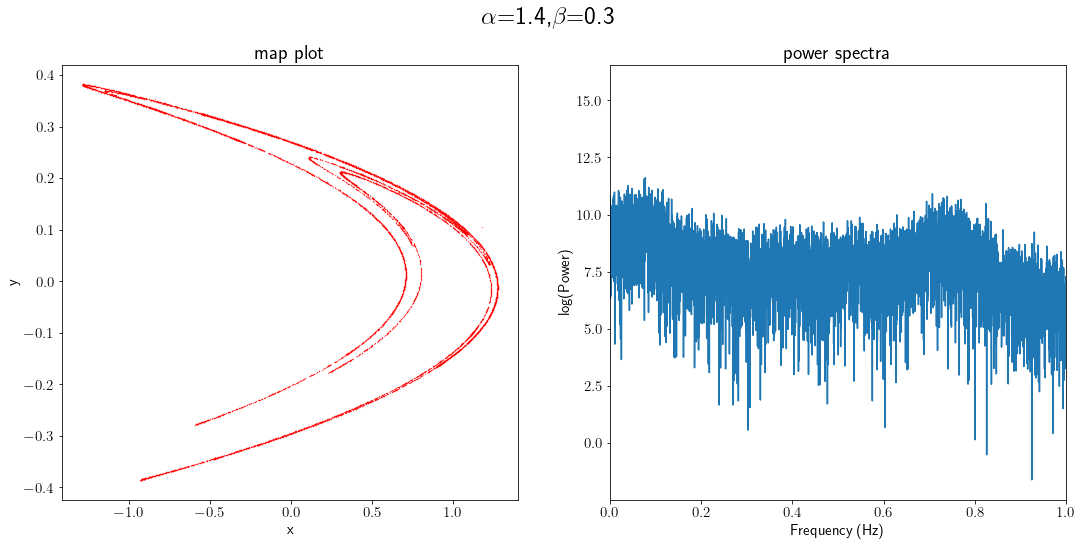

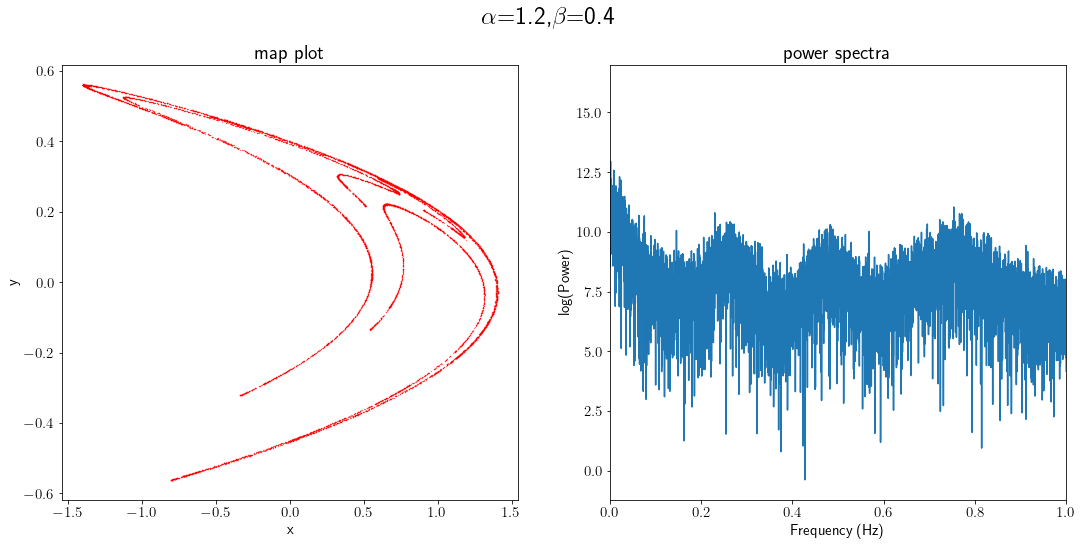

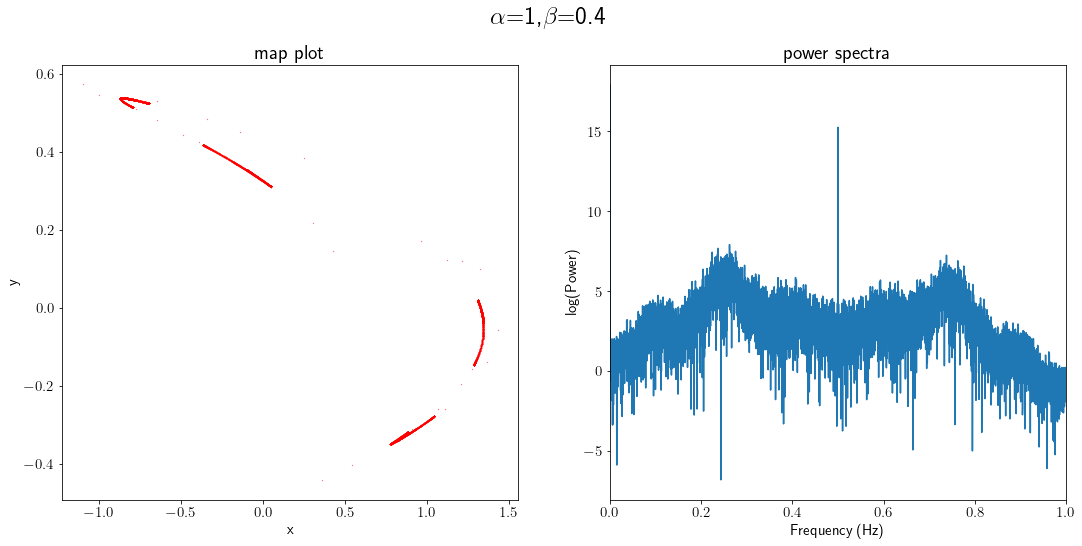

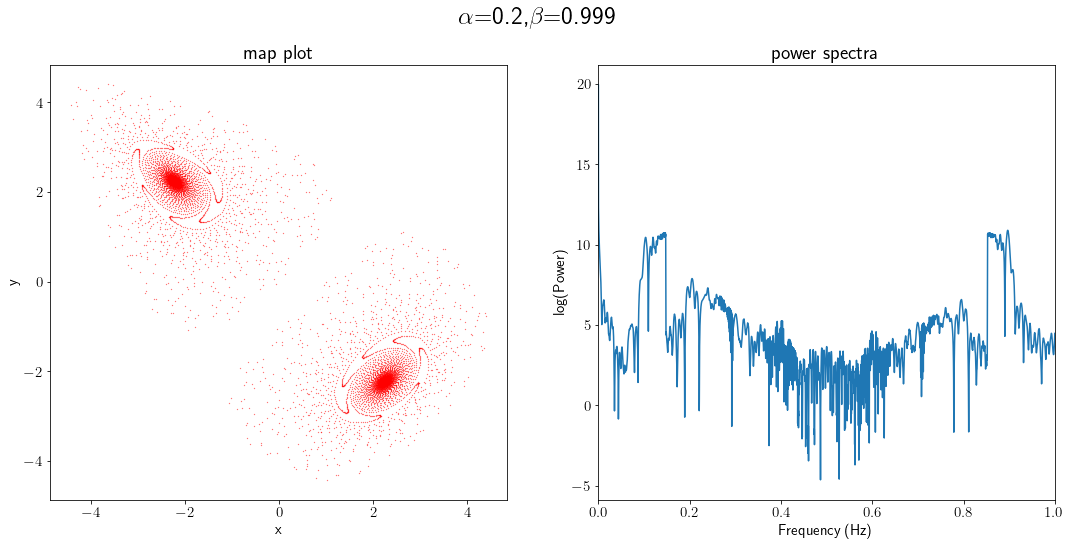

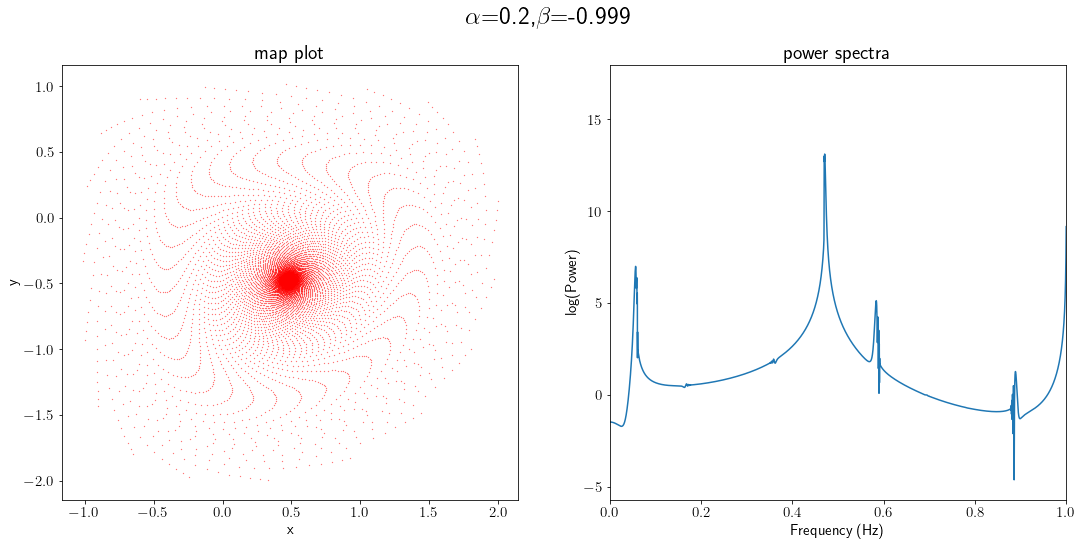

In [7]:
a=[1.4, 1.2, 1, 0.2, 0.2]
b=[0.3, 0.4, 0.4, 0.999, -0.999]
for a,b in zip(a,b):
    Henon_map(a,b,10000)    